## **Nhập các thư viện cần thiết**

In [1]:
from scipy import ndimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import cv2

## **Thực hiện đọc thông tin ảnh**

<class 'numpy.ndarray'>


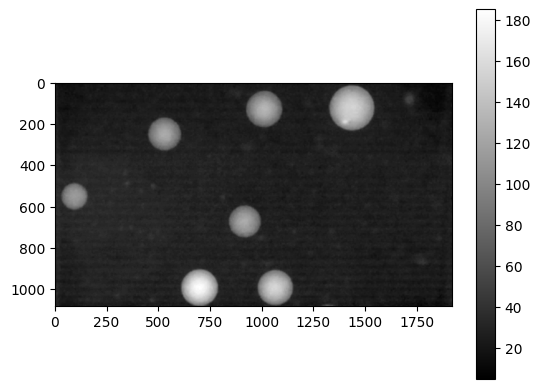

In [5]:
# đường dẫn nơi chứa ảnh
path = r'D:\important_for_study_master\Code_Ban_Q\2.jpg'
# sử dụng cv2.imread() để đọc thông tin bức ảnh
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = img[:,:,0]
blur = cv2.GaussianBlur(img2,(5,5),0)
# img = np.log(img[:,:,0])
# kiểm tra xem ảnh có không
print(type(img2))
# sử dụng plt hiển thị bức ảnh
showimg = plt.imshow(img2, cmap = 'gray')
# xem giá trị màu đại diện của ảnh
plt.colorbar()

## **Phân bố sáng**

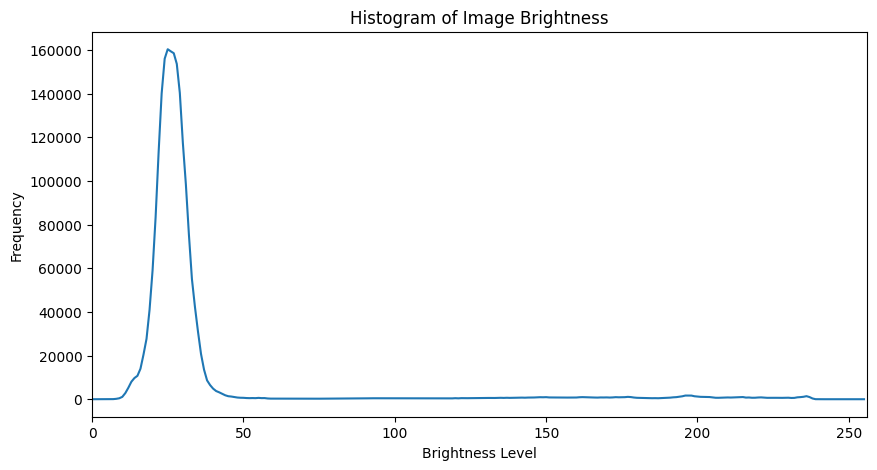

In [73]:
# Tính toán phân bố sáng (histogram)
histogram = cv2.calcHist([img2], [0], None, [256], [0, 256])
# Vẽ phân bố sáng
plt.figure(figsize=(10, 5))
plt.title('Histogram of Image Brightness')
plt.xlabel('Brightness Level')
plt.ylabel('Frequency')
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

## **Tìm đường bao**

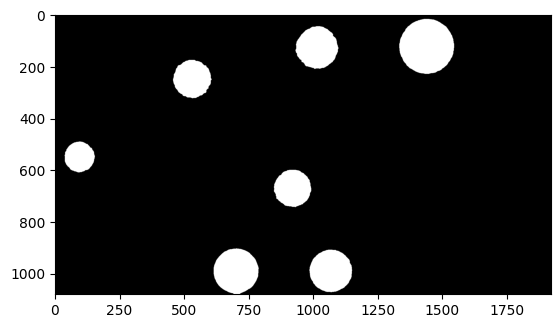

In [6]:
_, thresh = cv2.threshold(blur, 70, 150, cv2.THRESH_BINARY)
# Tạo kernel (structuring element) - kích thước 3x3
kernel = np.ones((3, 3), np.uint8)

# Thực hiện erode
erode = cv2.erode(thresh, kernel, iterations=1)
plt.imshow(erode, cmap ='gray')

Contour 1:
  - tâm: (1065.43, 990.41)
  - Bán kính: 82.86
  - Đường kính: 165.71
Cường độ sáng: 119.35472252499882
Contour 2:
  - tâm: (698.73, 992.09)
  - Bán kính: 88.25
  - Đường kính: 176.49
Cường độ sáng: 136.02780519907864
Contour 3:
  - tâm: (916.96, 672.27)
  - Bán kính: 73.07
  - Đường kính: 146.14
Cường độ sáng: 99.40307250881702
Contour 4:
  - tâm: (93.54, 550.62)
  - Bán kính: 59.64
  - Đường kính: 119.28
Cường độ sáng: 97.10336296160543
Contour 5:
  - tâm: (529.41, 250.03)
  - Bán kính: 74.65
  - Đường kính: 149.31
Cường độ sáng: 97.93229802826731
Contour 6:
  - tâm: (1011.10, 128.78)
  - Bán kính: 83.01
  - Đường kính: 166.01
Cường độ sáng: 100.49835868509871
Contour 7:
  - tâm: (1435.58, 124.24)
  - Bán kính: 106.56
  - Đường kính: 213.13
Cường độ sáng: 121.96265418970651
Số lượng khối cầu là: 7


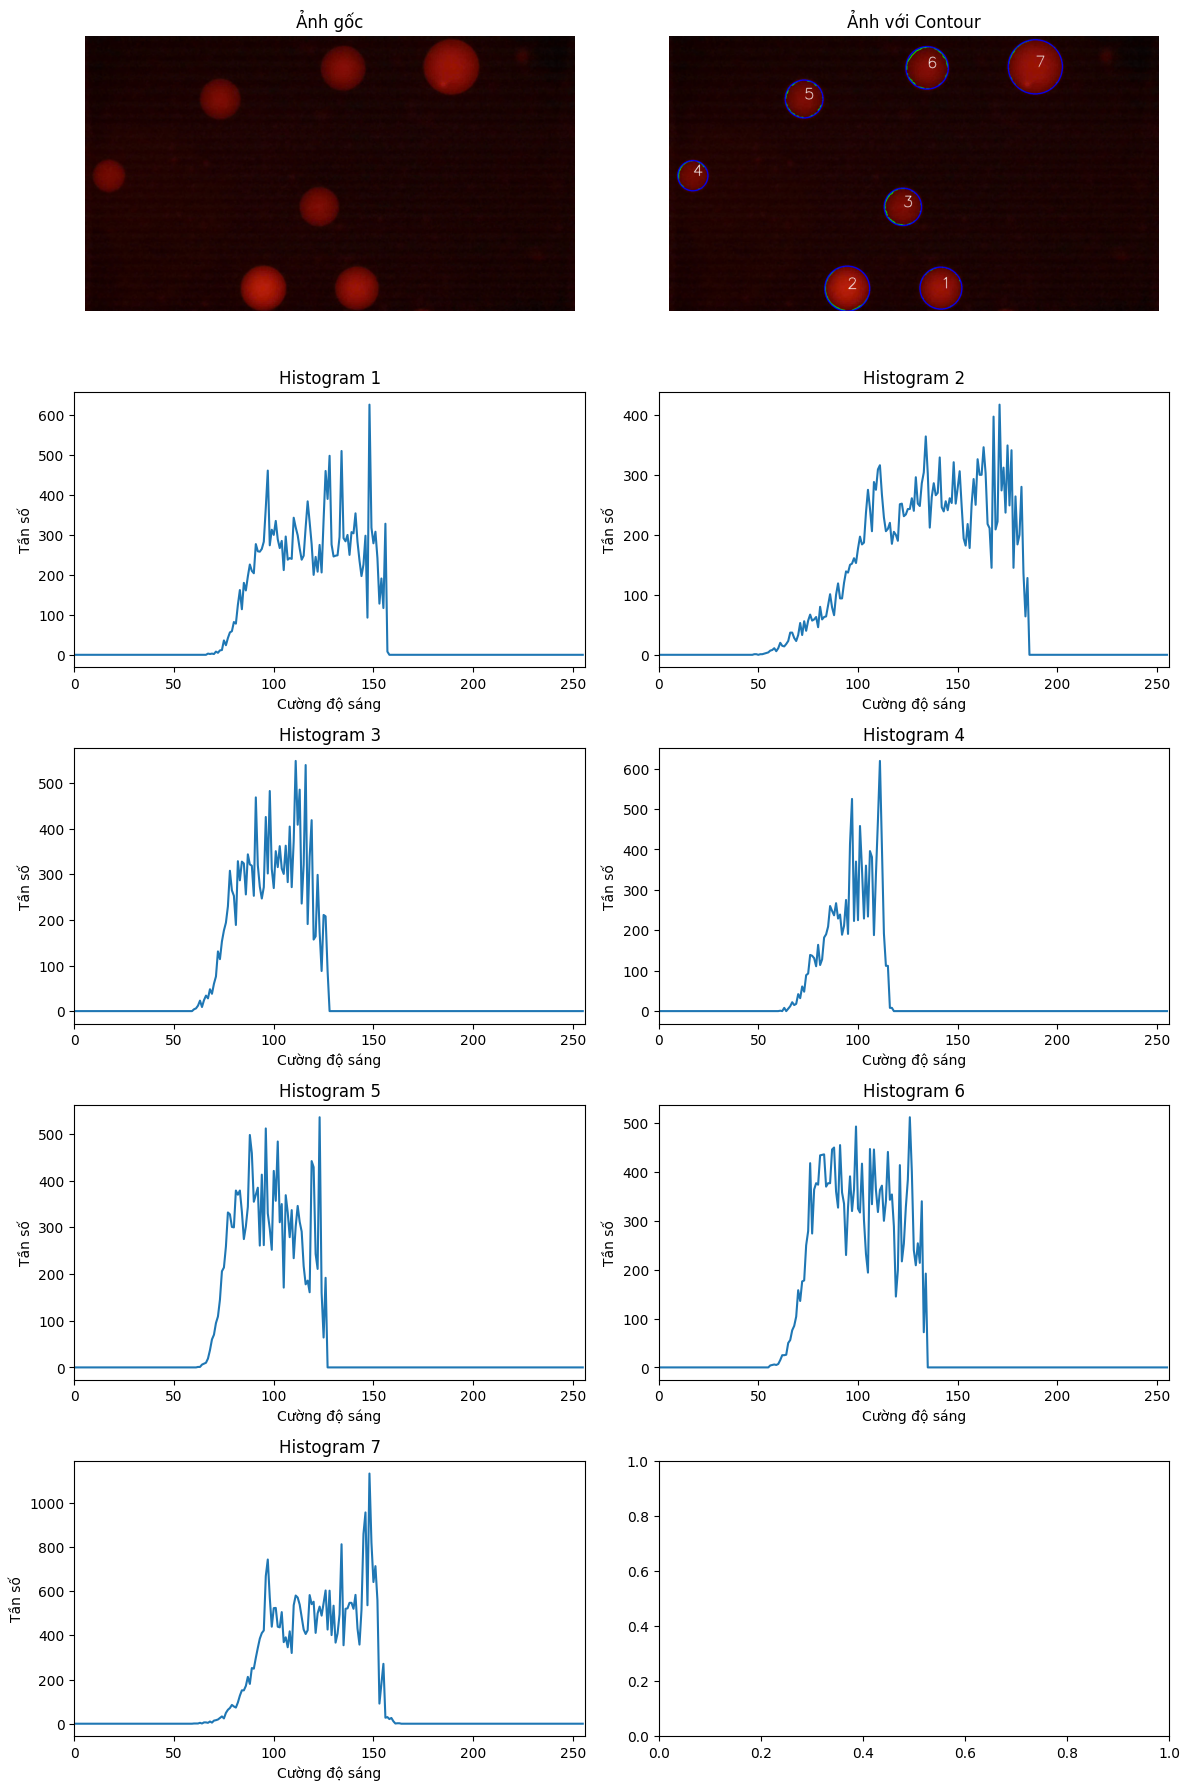

In [7]:
# Tìm kiếm contour
contours, _ = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

count = 0
# Tạo một danh sách để lưu các histogram của mỗi contour
histograms = []
# Vẽ contour và vòng tròn bao quanh lên ảnh gốc
contour_image = img.copy()
# Tính toán và in đường kính của từng contour
for i, contour in enumerate(contours):
    # Tìm vòng tròn bao quanh nhỏ nhất
    (x, y), radius = cv2.minEnclosingCircle(contour)
    diameter = radius * 2
    if diameter > 1.0:
        count+=1
        print(f"Contour {i + 1}:")
        print(f"  - tâm: ({x:.2f}, {y:.2f})")
        print(f"  - Bán kính: {radius:.2f}")
        print(f"  - Đường kính: {diameter:.2f}")
        
        # Chuyển đổi tọa độ gốc của text thành số nguyên
        center = (int(x), int(y))
         # Gắn text lên ảnh tại điểm trung tâm
        text = f'{i + 1}'
        cv2.putText(contour_image, text, center, cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2)
        cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)  # Vẽ contour bằng màu xanh lá cây
        cv2.circle(contour_image, (int(x), int(y)), int(radius), (0, 0, 255), 4)  # Vẽ vòng tròn bằng màu đỏ
        
        
        # Tính toán cường độ sáng
        # Tạo một mask (mặt nạ) với kích thước giống ảnh gốc
        mask = np.zeros_like(gray, dtype=np.uint8)

        # Vẽ vòng tròn lên mask
        cv2.circle(mask, center, int(radius), 255, thickness=-1)
        
        # Tạo một danh sách để lưu tọa độ của các pixel nằm trong vòng tròn
        circle_pixel_coords = []

        # Lấy tọa độ của các pixel nằm trong vòng tròn
        for y in range(mask.shape[0]):
            for x in range(mask.shape[1]):
                if mask[y, x] == 255:
                    circle_pixel_coords.append((x, y))

        # Tính toán cường độ sáng của các pixel nằm trong vòng tròn
        # Nếu ảnh là ảnh màu, chuyển đổi sang ảnh xám

        # Tính toán cường độ sáng trung bình
        circle_pixel_values = [gray[y, x] for x, y in circle_pixel_coords]
        
        # 1 dòng code làm nên mùa xuân
        average_intensity = np.mean(circle_pixel_values)
        
        print(f'Cường độ sáng: {average_intensity}')
        # Tính toán histogram cho cường độ sáng của các pixel trong vòng tròn
        histogram = cv2.calcHist([np.array(circle_pixel_values, dtype=np.uint8)], [0], None, [256], [0, 256])
        histograms.append(histogram)
        
        
print(f'Số lượng khối cầu là: {count}')
# Hiển thị hai ảnh với Matplotlib
fig, axes = plt.subplots(2 + (count // 2), 2, figsize=(12, 6 + (count // 2) * 4))

# Hiển thị ảnh gốc
axes[0, 0].imshow(img)
axes[0, 0].set_title('Ảnh gốc')
axes[0, 0].axis('off')

# Hiển thị ảnh với contour
axes[0, 1].imshow(contour_image)
axes[0, 1].set_title('Ảnh với Contour')
axes[0, 1].axis('off')

# Hiển thị histogram cho từng contour
for i, histogram in enumerate(histograms):
    row = (i // 2) + 1
    col = i % 2
    axes[row, col].plot(histogram)
    axes[row, col].set_title(f'Histogram {i + 1}')
    axes[row, col].set_xlim([0, 256])
    axes[row, col].set_xlabel('Cường độ sáng')
    axes[row, col].set_ylabel('Tần số')


plt.tight_layout()
plt.show()

Line length in pixels: 211.0


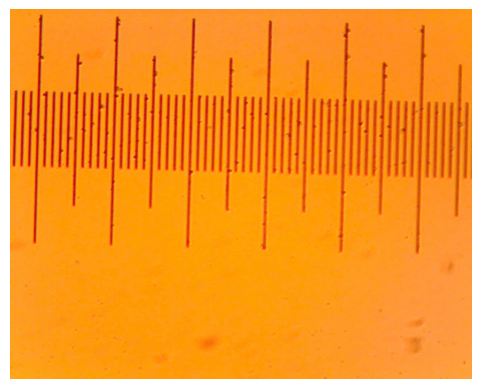

Saved line length: 211.0 pixels


In [20]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Initialize variables to store the points, drawing state, and line length
points = []
is_drawing = False
line_length = 0

# Function to display the coordinates of the points clicked on the image
def click_event(event, x, y, flags, params):
    global points, img_original, is_drawing, line_length
  
    if event == cv2.EVENT_LBUTTONDOWN:
        if not is_drawing:
            # Store the starting point and set drawing state
            points = [(x, y)]
            is_drawing = True
        else:
            # Store the ending point and finish drawing
            points.append((x, y))
            is_drawing = False

            # Draw the final line
            img = img_original.copy()
            cv2.line(img, points[0], points[1], (0, 255, 0), 2)
            cv2.imshow('image', img)

            # Calculate the Euclidean distance between the two points
            x1, y1 = points[0]
            x2, y2 = points[1]
            line_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            print(f"Line length in pixels: {line_length}")
            
            points.clear()
    
    if event == cv2.EVENT_MOUSEMOVE and is_drawing:
        # Update the image to show the line being drawn
        img = img_original.copy()
        cv2.line(img, points[0], (x, y), (0, 255, 0), 2)
        cv2.imshow('image', img)

# Reading the image
img_original = cv2.imread(r'D:\important_for_study_master\Code_Ban_Q\ruler1.jpg', 1)
img = img_original.copy()

# Displaying the image
cv2.imshow('image', img)

# Setting mouse handler for the image and calling the click_event() function
cv2.setMouseCallback('image', click_event)

# Wait for a key to be pressed to exit
cv2.waitKey(0)

# Close the window
cv2.destroyAllWindows()

# Display the result in Jupyter Notebook
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Now you can use the `line_length` variable for further calculations
print(f"Saved line length: {line_length} pixels")


In [5]:
length_per_pixel = 240/10**-3
print(length_per_pixel)

240000.0


In [6]:
import os
folder_path = r'D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính'
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']  # Danh sách các đuôi file ảnh

image_paths = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path) and any(filename.lower().endswith(ext) for ext in image_extensions):
        image_paths.append(file_path)

# In đường dẫn các file ảnh
for image_path in image_paths:
    print(image_path)

D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\0012_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\0013_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\0015_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\100_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\109_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\129_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\130_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\131_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\136_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\137_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\138_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\140_phatquang.png
D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính\1

In [16]:
import os
folder_path = r'D:\important_for_study_master\Code_Ban_Q\Ảnh hạt không dính'
folder_process = r'D:\important_for_study_master\Code_Ban_Q\process'
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']  # Danh sách các đuôi file ảnh
data_img = []

#đường dẫn các file ảnh
for filename in os.listdir(folder_path):
    path = os.path.join(folder_path, filename)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     #img = cv2.resize(img,(480,640))
    gray = img[:,:,0]
        
    blur = cv2.GaussianBlur(gray,(5,5),0)
    _, thresh = cv2.threshold(blur, 70, 150, cv2.THRESH_BINARY)
    # Tạo kernel (structuring element) - kích thước 3x3
    kernel = np.ones((3, 3), np.uint8)

    # Thực hiện erode
    erode = cv2.erode(thresh, kernel, iterations=1)
    # Tìm kiếm contour
    contours, _ = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    count = 0
    # # Tạo một danh sách để lưu các histogram của mỗi contour
    # histograms = []
    
    # Vẽ contour và vòng tròn bao quanh lên ảnh gốc
    contour_image = img.copy()
    # Tính toán và in đường kính của từng contour
    for i, contour in enumerate(contours):
        # Tìm vòng tròn bao quanh nhỏ nhất
        (x, y), r = cv2.minEnclosingCircle(contour)
        d = r * 2
        if d > 1.0:
            count+=1
            print(f"Contour {i + 1}:")
            print(f"  - tâm: ({x:.2f}, {y:.2f})")
            print(f"  - Bán kính: {r:.2f}")
            print(f"  - Đường kính: {d:.2f}")
            
            # Chuyển đổi tọa độ gốc của text thành số nguyên
            center = (int(x), int(y))
            # Gắn text lên ảnh tại điểm trung tâm
            text = f'{i + 1}'
            cv2.putText(contour_image, text, center, cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2)
            #cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)  # Vẽ contour bằng màu xanh lá cây
            cv2.circle(contour_image, (int(x), int(y)), int(r), (0, 0, 255), 4)  # Vẽ vòng tròn bằng màu đỏ
            
            
            # Tính toán cường độ sáng
            # Tạo một mask (mặt nạ) với kích thước giống ảnh gốc
            mask = np.zeros_like(gray, dtype=np.uint8)

            # Vẽ vòng tròn lên mask
            cv2.circle(mask, center, int(r), 255, thickness=-1)
            
            # Tạo một danh sách để lưu tọa độ của các pixel nằm trong vòng tròn
            circle_pixel_coords = []

            # Lấy tọa độ của các pixel nằm trong vòng tròn
            for y in range(mask.shape[0]):
                for x in range(mask.shape[1]):
                    if mask[y, x] == 255:
                        circle_pixel_coords.append((x, y))

            # Tính toán cường độ sáng của các pixel nằm trong vòng tròn
            # Nếu ảnh là ảnh màu, chuyển đổi sang ảnh xám

            # Tính toán cường độ sáng trung bình
            circle_pixel_values = [gray[y, x] for x, y in circle_pixel_coords]
            
            # 1 dòng code làm nên mùa xuân
            average_intensity = np.mean(circle_pixel_values)
            
            # # Tính toán histogram cho cường độ sáng của các pixel trong vòng tròn
            # histogram = cv2.calcHist([np.array(circle_pixel_values, dtype=np.uint8)], [0], None, [256], [0, 256])
            # histograms.append(histogram)
            
            # Thêm thông tin vào danh sách dữ liệu
            data_img.append({
                'Filename': filename,
                'countour': i,
                'center': (x,y),
                'bán kính': r,
                'đường kính': d,
                'cường độ sáng trung bình': average_intensity
            })
            
    contour_image = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
    # Lưu ảnh đã xử lý vào thư mục đích
    destination_path = os.path.join(folder_process, filename)
    cv2.imwrite(destination_path, contour_image)

Contour 1:
  - tâm: (999.82, 957.29)
  - Bán kính: 114.66
  - Đường kính: 229.31
Contour 2:
  - tâm: (396.03, 937.19)
  - Bán kính: 124.95
  - Đường kính: 249.90
Contour 3:
  - tâm: (710.75, 885.87)
  - Bán kính: 124.52
  - Đường kính: 249.04
Contour 4:
  - tâm: (229.02, 658.62)
  - Bán kính: 141.53
  - Đường kính: 283.06
Contour 5:
  - tâm: (1919.00, 460.00)
  - Bán kính: 133.00
  - Đường kính: 266.00
Contour 6:
  - tâm: (1541.50, 450.95)
  - Bán kính: 138.03
  - Đường kính: 276.05
Contour 7:
  - tâm: (1250.91, 246.94)
  - Bán kính: 178.61
  - Đường kính: 357.23
Contour 8:
  - tâm: (747.28, 119.31)
  - Bán kính: 115.53
  - Đường kính: 231.05
Contour 1:
  - tâm: (1235.96, 931.26)
  - Bán kính: 163.65
  - Đường kính: 327.29
Contour 2:
  - tâm: (1918.00, 547.00)
  - Bán kính: 120.00
  - Đường kính: 240.01
Contour 3:
  - tâm: (1438.93, 493.00)
  - Bán kính: 105.43
  - Đường kính: 210.86
Contour 4:
  - tâm: (1203.50, 456.00)
  - Bán kính: 116.63
  - Đường kính: 233.27
Contour 5:
  - tâm: (

In [19]:
import pandas as pd
df = pd.DataFrame(data_img)
df

,Filename,countour,center,bán kính,đường kính,cường độ sáng trung bình
0,0012_phatquang.png,0,"(1919, 1079)",114.656670,229.313339,169.330964
1,0012_phatquang.png,1,"(1919, 1079)",124.951683,249.903366,175.837685
2,0012_phatquang.png,2,"(1919, 1079)",124.518539,249.037079,173.411379
3,0012_phatquang.png,3,"(1919, 1079)",141.531235,283.062469,189.185703
4,0012_phatquang.png,4,"(1919, 1079)",133.000107,266.000214,87.189202
...,...,...,...,...,...,...
130,91_phatquang.png,1,"(1919, 1079)",99.552628,199.105255,155.358325
131,91_phatquang.png,2,"(1919, 1079)",81.889954,163.779907,128.830428
132,91_phatquang.png,3,"(1919, 1079)",6.500100,13.000200,70.867257
133,91_phatquang.png,4,"(1919, 1079)",159.013733,318.027466,158.039342


In [22]:
per_pixel = line_length/100
per_pixel

2.11

In [23]:
df['d_process'] = df['đường kính'] * per_pixel
df

,Filename,countour,center,bán kính,đường kính,cường độ sáng trung bình,d_process
0,0012_phatquang.png,0,"(1919, 1079)",114.656670,229.313339,169.330964,483.851146
1,0012_phatquang.png,1,"(1919, 1079)",124.951683,249.903366,175.837685,527.296102
2,0012_phatquang.png,2,"(1919, 1079)",124.518539,249.037079,173.411379,525.468236
3,0012_phatquang.png,3,"(1919, 1079)",141.531235,283.062469,189.185703,597.261811
4,0012_phatquang.png,4,"(1919, 1079)",133.000107,266.000214,87.189202,561.260451
...,...,...,...,...,...,...,...
130,91_phatquang.png,1,"(1919, 1079)",99.552628,199.105255,155.358325,420.112088
131,91_phatquang.png,2,"(1919, 1079)",81.889954,163.779907,128.830428,345.575604
132,91_phatquang.png,3,"(1919, 1079)",6.500100,13.000200,70.867257,27.430423
133,91_phatquang.png,4,"(1919, 1079)",159.013733,318.027466,158.039342,671.037953


In [25]:
df = df.rename(columns={
    'đường kính': 'd',
    'bán kính': 'r'
})
df

,Filename,countour,center,r,d,cường độ sáng trung bình,d_process
0,0012_phatquang.png,0,"(1919, 1079)",114.656670,229.313339,169.330964,483.851146
1,0012_phatquang.png,1,"(1919, 1079)",124.951683,249.903366,175.837685,527.296102
2,0012_phatquang.png,2,"(1919, 1079)",124.518539,249.037079,173.411379,525.468236
3,0012_phatquang.png,3,"(1919, 1079)",141.531235,283.062469,189.185703,597.261811
4,0012_phatquang.png,4,"(1919, 1079)",133.000107,266.000214,87.189202,561.260451
...,...,...,...,...,...,...,...
130,91_phatquang.png,1,"(1919, 1079)",99.552628,199.105255,155.358325,420.112088
131,91_phatquang.png,2,"(1919, 1079)",81.889954,163.779907,128.830428,345.575604
132,91_phatquang.png,3,"(1919, 1079)",6.500100,13.000200,70.867257,27.430423
133,91_phatquang.png,4,"(1919, 1079)",159.013733,318.027466,158.039342,671.037953


In [26]:
df = df.rename(columns={
    'cường độ sáng trung bình': 'mean_intensity',
})
df

,Filename,countour,center,r,d,mean_intensity,d_process
0,0012_phatquang.png,0,"(1919, 1079)",114.656670,229.313339,169.330964,483.851146
1,0012_phatquang.png,1,"(1919, 1079)",124.951683,249.903366,175.837685,527.296102
2,0012_phatquang.png,2,"(1919, 1079)",124.518539,249.037079,173.411379,525.468236
3,0012_phatquang.png,3,"(1919, 1079)",141.531235,283.062469,189.185703,597.261811
4,0012_phatquang.png,4,"(1919, 1079)",133.000107,266.000214,87.189202,561.260451
...,...,...,...,...,...,...,...
130,91_phatquang.png,1,"(1919, 1079)",99.552628,199.105255,155.358325,420.112088
131,91_phatquang.png,2,"(1919, 1079)",81.889954,163.779907,128.830428,345.575604
132,91_phatquang.png,3,"(1919, 1079)",6.500100,13.000200,70.867257,27.430423
133,91_phatquang.png,4,"(1919, 1079)",159.013733,318.027466,158.039342,671.037953


In [27]:
df.to_csv(r'D:\important_for_study_master\Code_Ban_Q\data_img.csv', index=False)